#Overview

#####Importing Libraries to prepare for Exploratory Data Analysis 

In [ ]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns

In [ ]:
#reading in the dataframe
IP_df = pd.read_csv('/content/drive/My Drive/Financial Metrics/IP_transactions_data.csv')
IP_df

,CUSTOMER_ID,TRANSACTION_PERIOD,REVENUE,CUSTOMER_TYPE,YEAR,PROFIT,IS_TREATMENT_FLAG
0,307,2015-03-31 00:00:00.000,50.47,Education,2015,10.68,NaN
1,305,2015-03-31 00:00:00.000,128.99,Education,2015,23.98,NaN
2,920,2015-03-31 00:00:00.000,81.08,Education,2015,43.22,NaN
3,299,2015-03-31 00:00:00.000,121.52,Tech,2015,20.75,NaN
4,298,2015-03-31 00:00:00.000,98.28,Tech,2015,36.09,NaN
...,...,...,...,...,...,...,...
127784,1804,2018-03-31 00:00:00.000,-173.13,Tech,2018,-61.09,NaN
127785,1801,2018-03-31 00:00:00.000,-111.95,Tech,2018,-58.48,NaN
127786,1789,2018-03-31 00:00:00.000,-86.76,Tech,2018,-29.20,NaN
127787,942,2018-03-31 00:00:00.000,-158.20,Education,2018,-63.15,NaN


#####Sorting the YEAR column

In [ ]:
IP_df = IP_df.sort_values("YEAR")
IP_df

,CUSTOMER_ID,TRANSACTION_PERIOD,REVENUE,CUSTOMER_TYPE,YEAR,PROFIT,IS_TREATMENT_FLAG
0,307,2015-03-31 00:00:00.000,50.47,Education,2015,10.68,NaN
3284,238,2015-09-30 00:00:00.000,122.81,Education,2015,12.96,NaN
3283,237,2015-09-30 00:00:00.000,143.58,Education,2015,50.10,NaN
3282,941,2015-09-30 00:00:00.000,126.76,Education,2015,40.97,NaN
3281,1164,2015-09-30 00:00:00.000,113.45,Education,2015,37.22,NaN
...,...,...,...,...,...,...,...
104489,18272,2021-06-30 00:00:00.000,78.25,Education,2021,NaN,False
104490,18271,2021-06-30 00:00:00.000,66.88,Education,2021,NaN,False
104491,18295,2021-06-30 00:00:00.000,93.11,Education,2021,NaN,False
104485,18211,2021-06-30 00:00:00.000,62.77,Education,2021,NaN,False


###Initial Exploratory Analysis - Data Cleaning 

In [ ]:
IP_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127789 entries, 0 to 102489
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CUSTOMER_ID         127789 non-null  int64  
 1   TRANSACTION_PERIOD  127789 non-null  object 
 2   REVENUE             127789 non-null  float64
 3   CUSTOMER_TYPE       127789 non-null  object 
 4   YEAR                127789 non-null  int64  
 5   PROFIT              92854 non-null   float64
 6   IS_TREATMENT_FLAG   34934 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 7.8+ MB


In [ ]:
#checking datatypes
IP_df.dtypes

CUSTOMER_ID             int64
TRANSACTION_PERIOD     object
REVENUE               float64
CUSTOMER_TYPE          object
YEAR                    int64
PROFIT                float64
IS_TREATMENT_FLAG      object
dtype: object

#####Changing data type of CUSTOMER_ID and YEAR to object from integer so that the categorical values do not undergo any sort of calculation

In [ ]:
#changing column types to correct types
IP_df = IP_df.astype({"CUSTOMER_ID": object, "YEAR": object})
#checking
IP_df.dtypes

CUSTOMER_ID            object
TRANSACTION_PERIOD     object
REVENUE               float64
CUSTOMER_TYPE          object
YEAR                   object
PROFIT                float64
IS_TREATMENT_FLAG      object
dtype: object

In [ ]:
#checking for null values
IP_df.isnull().sum()

CUSTOMER_ID               0
TRANSACTION_PERIOD        0
REVENUE                   0
CUSTOMER_TYPE             0
YEAR                      0
PROFIT                34935
IS_TREATMENT_FLAG     92855
dtype: int64

#####Checking whether all null values for PROFIT are for 2021

In [ ]:
#creating a dataframe where profit value is null 
ProfitNull_df = IP_df[IP_df.PROFIT.isnull()]
#double checking if all the profit values is null
ProfitNull_df['PROFIT'].unique()

array([nan])

In [ ]:
#checking whether year values for all null profit values is the same
ProfitNull_df['YEAR'].unique()

array([2021], dtype=object)

#####Since all the Null values for PROFIT are for 2021, there is no need to remove any cells. 

#####Checking whether all null values for IS_TREATMENT_FLAG belong to 2015-2020 as the testing is only done to customers in 2021

In [ ]:
#creating a dataframe where IS_TREATMENT_FLAG value is null 
TreatmentNull_df = IP_df[IP_df.IS_TREATMENT_FLAG.isnull()]
#double checking if all the IS_TREATMENT_FLAG values is null
TreatmentNull_df['IS_TREATMENT_FLAG'].unique()

array([nan], dtype=object)

In [ ]:
#checking whether year values for all null IS_TREATMENT_FLAG values is the same
TreatmentNull_df['YEAR'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=object)

#####Since there might be one or more cases where IS_TREATMENT_FLAG is null for 2021, it is necessary to inspect this further and remove it if possible

In [ ]:
TreatmentNull_df.groupby('YEAR').count()

,CUSTOMER_ID,TRANSACTION_PERIOD,REVENUE,CUSTOMER_TYPE,PROFIT,IS_TREATMENT_FLAG
YEAR,,,,,,
2015,4921,4921,4921,4921,4921,0
2016,6304,6304,6304,6304,6304,0
2017,9264,9264,9264,9264,9264,0
2018,16259,16259,16259,16259,16259,0
2019,24794,24794,24794,24794,24794,0
2020,31312,31312,31312,31312,31312,0
2021,1,1,1,1,0,0


#####Since there is just one row in 2021 with a null value, it is okay to remove the row.

In [ ]:
# Getting indexes where YEAR column has value 2021 and IS_TREATMENT_FLAG column is null
indexNames = IP_df[(IP_df['YEAR'] == 2021) & (IP_df['IS_TREATMENT_FLAG'].isnull())].index
# Deleting these row indexes from dataFrame
IP_df.drop(indexNames , inplace=True)
IP_df.shape

(127788, 7)

#####There is one less row than the original dataset so the row has been removed

#####Saving this dataset as "Cleaned_Data.csv" in Drive. 

In [ ]:
IP_df.to_csv('/content/drive/My Drive/Blackstone Case Study/Cleaned_Data.csv', encoding='utf-8', index=False)

#####Exploring how different customer types contributed to the Revenue throughout the years

In [ ]:
IP_df1 = IP_df.groupby(["YEAR","CUSTOMER_TYPE"]).sum()
#switch from scinotation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
IP_df1

REVENUE    PROFIT
YEAR CUSTOMER_TYPE                     
2015 Education      381953.62 112104.87
     Tech           199492.38  59022.46
2016 Education      749545.36 212140.46
     Tech           300067.51 108625.50
2017 Education      905194.53 347829.63
     Tech           546363.09 177507.64
2018 Education     1430265.29 481119.24
     Tech           684219.62 230096.57
2019 Education     1865460.20 730949.34
     Tech           925668.92 366015.19
2020 Education     2009986.27 694714.06
     Tech          1004956.17 346535.74
2021 Education     1848031.07      0.00
     Tech           919036.55      0.00

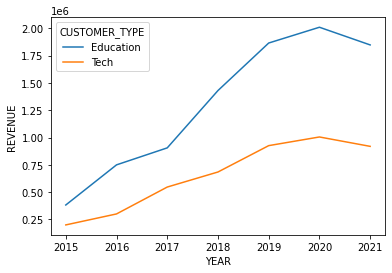

In [ ]:
sns.lineplot(data=IP_df1, x="YEAR", y="REVENUE", hue="CUSTOMER_TYPE")

#####The graph above shows that people from the Education sector contributed much more to the Reveue of Info-Print from 2015-2021. It also shows a dip in Revenue in 2021 for both sectors.

#####Exploring customer growth based on customer types over the years 

In [ ]:
IP_df2 = IP_df.groupby(["YEAR","CUSTOMER_TYPE"]).count()
IP_df2

CUSTOMER_ID  TRANSACTION_PERIOD  REVENUE  PROFIT  \
YEAR CUSTOMER_TYPE                                                     
2015 Education             3257                3257     3257    3257   
     Tech                  1664                1664     1664    1664   
2016 Education             4202                4202     4202    4202   
     Tech                  2102                2102     2102    2102   
2017 Education             6201                6201     6201    6201   
     Tech                  3063                3063     3063    3063   
2018 Education            10977               10977    10977   10977   
     Tech                  5282                5282     5282    5282   
2019 Education            16528               16528    16528   16528   
     Tech                  8266                8266     8266    8266   
2020 Education            20815               20815    20815   20815   
     Tech                 10497               10497    10497   10497   
2021 Education            23249               23249    23249       0   
     Tech                 11685               11685    11685       0   

                    IS_TREATMENT_FLAG  
YEAR CUSTOMER_TYPE                     
2015 Education                      0  
     Tech                           0  
2016 Education                      0  
     Tech                           0  
2017 Education                      0  
     Tech                           0  
2018 Education                      0  
     Tech                           0  
2019 Education                      0  
     Tech                           0  
2020 Education                      0  
     Tech                           0  
2021 Education                  23249  
     Tech                       11685

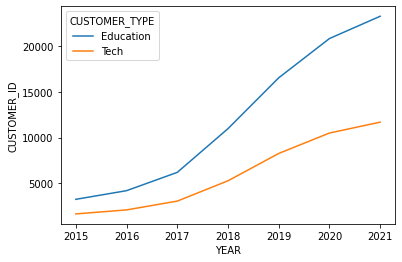

In [ ]:
sns.lineplot(data=IP_df2, x="YEAR", y="CUSTOMER_ID", hue="CUSTOMER_TYPE")

##### Both types of customers increased in number from 2015-2023. There is always a higher number of Education customers as expected.



#HOW IS REVENUE DECREASING IN 2021 WHEN CUSTOMER NUMBER IS INCREASING?

###Analysis

#####Further cleaning data by removing all 2021 cases as it's usage is not requires. 

In [ ]:
Analysis_df = IP_df.drop(IP_df[IP_df.YEAR == 2021].index)
Analysis_df

,CUSTOMER_ID,TRANSACTION_PERIOD,REVENUE,CUSTOMER_TYPE,YEAR,PROFIT,IS_TREATMENT_FLAG
0,307,2015-03-31 00:00:00.000,50.47,Education,2015,10.68,NaN
3284,238,2015-09-30 00:00:00.000,122.81,Education,2015,12.96,NaN
3283,237,2015-09-30 00:00:00.000,143.58,Education,2015,50.10,NaN
3282,941,2015-09-30 00:00:00.000,126.76,Education,2015,40.97,NaN
3281,1164,2015-09-30 00:00:00.000,113.45,Education,2015,37.22,NaN
...,...,...,...,...,...,...,...
71964,13197,2020-06-30 00:00:00.000,57.29,Tech,2020,28.20,NaN
71963,8912,2020-06-30 00:00:00.000,90.96,Tech,2020,41.94,NaN
71968,13194,2020-06-30 00:00:00.000,68.32,Education,2020,38.75,NaN
71969,8891,2020-06-30 00:00:00.000,57.24,Tech,2020,22.06,NaN


In [ ]:
#double checking whether all 2021 values are removed
Analysis_df['YEAR'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=object)

In [ ]:
#checking summary statistics for this dataset 
Analysis_df.describe()

,REVENUE,PROFIT
count,92854.00,92854.00
mean,118.50,41.64
std,611.68,31.36
min,-246.62,-121.82
25%,79.86,21.11
50%,101.13,34.21
75%,133.77,52.89
max,158841.51,332.57


#####Since the mean and median are relatively close, graphs for both revenue and profit are normally distributed.

In [ ]:
#checking null values and data types
Analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92854 entries, 0 to 71967
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CUSTOMER_ID         92854 non-null  object 
 1   TRANSACTION_PERIOD  92854 non-null  object 
 2   REVENUE             92854 non-null  float64
 3   CUSTOMER_TYPE       92854 non-null  object 
 4   YEAR                92854 non-null  object 
 5   PROFIT              92854 non-null  float64
 6   IS_TREATMENT_FLAG   0 non-null      object 
dtypes: float64(2), object(5)
memory usage: 5.7+ MB


#####All rows are null in the IS_TREATMENT_FLAG column because the experiment is conducted on customers in 2021. Since this column is not needed for this part of the analysis, it can be removed. TRANSACTION_PERIOD can also be removed as this is also not needed for now. 

In [ ]:
#Removing columns TRANSACTION_PERIOD and IS_TREATMENT_FLAG
Analysis_df1 = Analysis_df.drop(columns = ["TRANSACTION_PERIOD","IS_TREATMENT_FLAG"])
Analysis_df1.head()

,CUSTOMER_ID,REVENUE,CUSTOMER_TYPE,YEAR,PROFIT
0,307,50.47,Education,2015,10.68
3284,238,122.81,Education,2015,12.96
3283,237,143.58,Education,2015,50.10
3282,941,126.76,Education,2015,40.97
3281,1164,113.45,Education,2015,37.22


#####Calculating Annual Revenue, Annual Profit and Annual Profit Margin for 2015-2020.

In [ ]:
Analysis_df2 = Analysis_df.groupby('YEAR').sum()
Analysis_df2.rename(columns = {'REVENUE':'ANNUAL_REVENUE', 'PROFIT':'ANNUAL_PROFIT'}, inplace = True)

#switch from scinotation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
Analysis_df2

,ANNUAL_REVENUE,ANNUAL_PROFIT
YEAR,,
2015,581446.00,171127.34
2016,1049612.87,320765.97
2017,1451557.62,525337.27
2018,2114484.91,711215.80
2019,2791129.12,1096964.53
2020,3014942.44,1041249.80


#####Calculating Annual Profit Margin by dividing Annual Profit by Annual Revenue for each year.

In [ ]:
Analysis_df2['ANNUAL_PROFIT_MARGIN'] = Analysis_df2['ANNUAL_PROFIT'] / Analysis_df2['ANNUAL_REVENUE']
Analysis_df3 = Analysis_df2.reset_index()
Analysis_df3

,YEAR,ANNUAL_REVENUE,ANNUAL_PROFIT,ANNUAL_PROFIT_MARGIN
0,2015,581446.00,171127.34,0.29
1,2016,1049612.87,320765.97,0.31
2,2017,1451557.62,525337.27,0.36
3,2018,2114484.91,711215.80,0.34
4,2019,2791129.12,1096964.53,0.39
5,2020,3014942.44,1041249.80,0.35


In [ ]:
Analysis_df3.to_csv('/content/drive/My Drive/Financial Metrics/FinancialMetrics.csv', encoding='utf-8', index=False)